<a href="https://colab.research.google.com/github/farestammous/News_Classification/blob/main/LogisticRegression_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


# Load the dataset
file_path = '/content/drive/MyDrive/Dataset/inshort_news_data-1.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(df.head())


   Unnamed: 0                                      news_headline  \
0           0  50-year-old problem of biology solved by Artif...   
1           1  Microsoft Teams to stop working on Internet Ex...   
2           2  Hope US won't erect barriers to cooperation: C...   
3           3  Global smartphone sales in Q3 falls 5.7% to 36...   
4           4  EU hoping Biden will clarify US position on di...   

                                        news_article news_category  
0  DeepMind's AI system 'AlphaFold' has been reco...    technology  
1  Microsoft Teams will stop working on Internet ...    technology  
2  China, in response to reports of US adding Chi...    technology  
3  The global smartphone sales in the third quart...    technology  
4  The European Union (EU) is hoping that US Pres...    technology  


In [ ]:
#Explore and Prepare Data

# Explore the dataset
print("Dataset Info:")
print(df.info())

# Check for any missing values
print("\nMissing Values:")
print(df.isnull().sum())

categories = df['news_category'].unique()
print("\nCategories:", categories)






Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4817 entries, 0 to 4816
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     4817 non-null   int64 
 1   news_headline  4817 non-null   object
 2   news_article   4817 non-null   object
 3   news_category  4817 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.7+ KB
None

Missing Values:
Unnamed: 0       0
news_headline    0
news_article     0
news_category    0
dtype: int64

Categories: ['technology' 'sports' 'world' 'politics' 'entertainment' 'automobile'
 'science']


In [ ]:
#Text Preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
nltk.download('stopwords')


text_data = df['news_article']


# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenization and removal of stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in text.split() if word not in stop_words]
    # Stemming


# Apply text preprocessing to the 'news_article' column
df['processed_news'] = df['news_article'].apply(preprocess_text)

# Display the processed data
print("\nProcessed Data:")
print(df[['news_article', 'processed_news']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Processed Data:
                                        news_article  \
0  DeepMind's AI system 'AlphaFold' has been reco...   
1  Microsoft Teams will stop working on Internet ...   
2  China, in response to reports of US adding Chi...   
3  The global smartphone sales in the third quart...   
4  The European Union (EU) is hoping that US Pres...   

                                      processed_news  
0  deepmind ai system alphafold recognis solut pr...  
1  microsoft team stop work internet explor today...  
2  china respons report us ad chines chipmak smic...  
3  global smartphon sale third quarter fell yearo...  
4  european union eu hope us presidentelect joe b...  


In [ ]:
#Feature Extraction

from sklearn.feature_extraction.text import TfidfVectorizer


X = df['processed_news']

# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)



y = df['news_category']

In [ ]:
#Build the Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)

#Evaluate the Model

from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9294605809128631
Classification Report:
                precision    recall  f1-score   support

   automobile       0.88      0.95      0.92        40
entertainment       0.94      0.98      0.96       182
     politics       0.99      1.00      1.00       110
      science       0.93      0.77      0.84        87
       sports       0.99      0.96      0.97       172
   technology       0.84      0.87      0.85       156
        world       0.91      0.94      0.92       217

     accuracy                           0.93       964
    macro avg       0.93      0.92      0.92       964
 weighted avg       0.93      0.93      0.93       964



In [ ]:
# Example new text
new_text = "In a groundbreaking discovery that has captivated the scientific community, researchers have identified a new species of deep-sea creatures thriving in the unexplored depths of the ocean. These bioluminescent organisms, tentatively named 'Abyssal Luminaries,' possess unique adaptations that allow them to survive under extreme pressure and near-total darkness. Scientists believe this discovery may provide valuable insights into the mysteries of deep-sea ecosystems and contribute to our understanding of life on Earth"
preprocessed_text = preprocess_text(new_text)

# Transform the text into TF-IDF features
new_text_tfidf = tfidf_vectorizer.transform([preprocessed_text])

# Make predictions with the trained model
prediction = model.predict(new_text_tfidf)

# Display the predicted category
print("Predicted Category:", prediction[0])

predicted_category = prediction[0]
plt.figure(figsize=(6, 2))
plt.barh([0], [1], color='skyblue', edgecolor='black')
plt.yticks([0], [predicted_category])
plt.xlabel('Confidence Level')
plt.title('Predicted Category for New Text')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


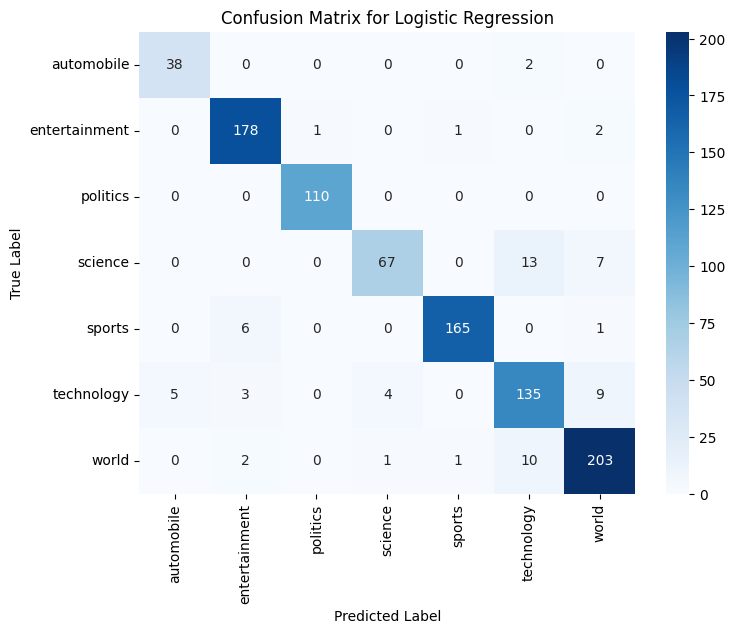

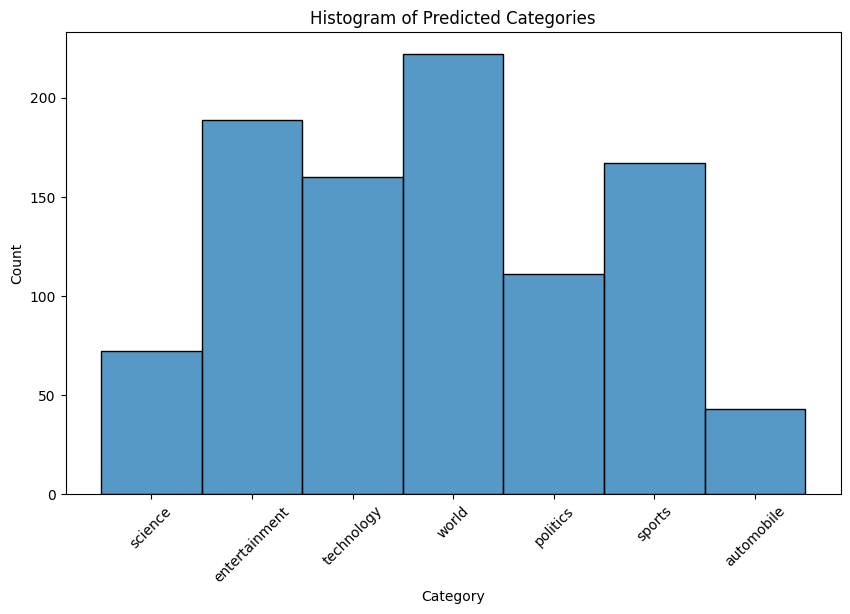

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Function to plot a confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot the confusion matrix for the test set
plot_confusion_matrix(y_test, y_pred, classes=model.classes_, title='Confusion Matrix for Logistic Regression')

# Plot a histogram of predicted categories
plt.figure(figsize=(10, 6))
sns.histplot(y_pred, bins=len(model.classes_), kde=False)
plt.title('Histogram of Predicted Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


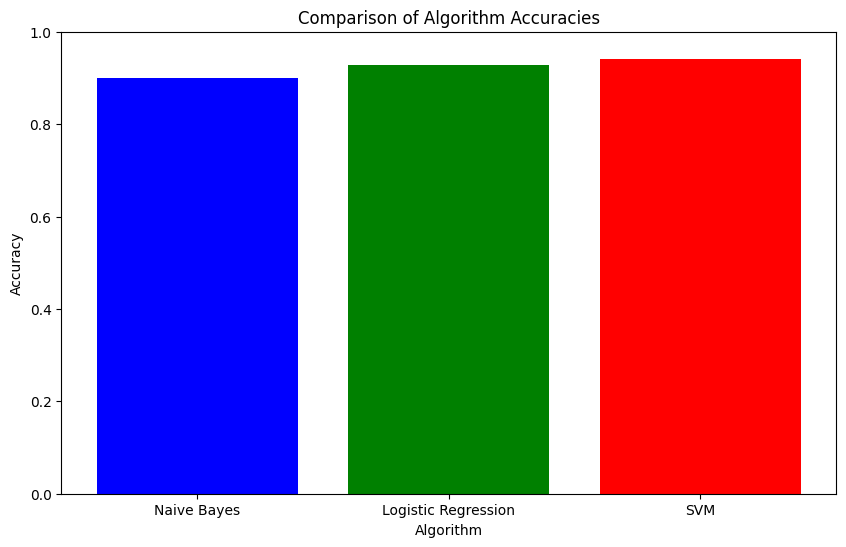

In [ ]:
import matplotlib.pyplot as plt

# Sample accuracy scores for Naive Bayes and Logistic Regression
accuracy_naive_bayes = 0.90  #accuracy for Naive Bayes
accuracy_logistic_regression = 0.929  #accuracy for Logistic Regression
accuracy_SVM = 0.942 #accuracy for svm

# Creating a bar chart
algorithms = ['Naive Bayes', 'Logistic Regression' , 'SVM']
accuracies = [accuracy_naive_bayes, accuracy_logistic_regression , accuracy_SVM]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green' , 'red'])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Comparison of Algorithm Accuracies')
plt.ylim(0, 1)  # Setting the limit for y-axis from 0 to 1 as accuracy ranges between 0 and 1
plt.show()
